# GeoScripting Exam 2022 - Exercise 1 and 3 - Difference calculation of a glacial scence

<i>Author: Nikolaos Kolaxidis <br/>
Date: 26.07.2022</i>

Deriving difference between raster...
...reading the raster ./data/glacier_2017.tif...
...reading ./data/glacier_2017.tif worked.
...reading the raster ./data/glacier_2009.tif...
...reading ./data/glacier_2009.tif worked.
Finished computing the difference of the DEMs with inputs ./data/glacier_2009.tif & ./data/glacier_2017.tif. 
 The script took 0.01 seconds to run.
--- STATISTICS OF DIFFERENCES ---
Minimum difference: -31.56 m
Maximum difference: 6.56 m
Mean difference: -4.58 m
Median difference: -0.68 m
Std.dev. of difference: 7.47 m
---------------------------


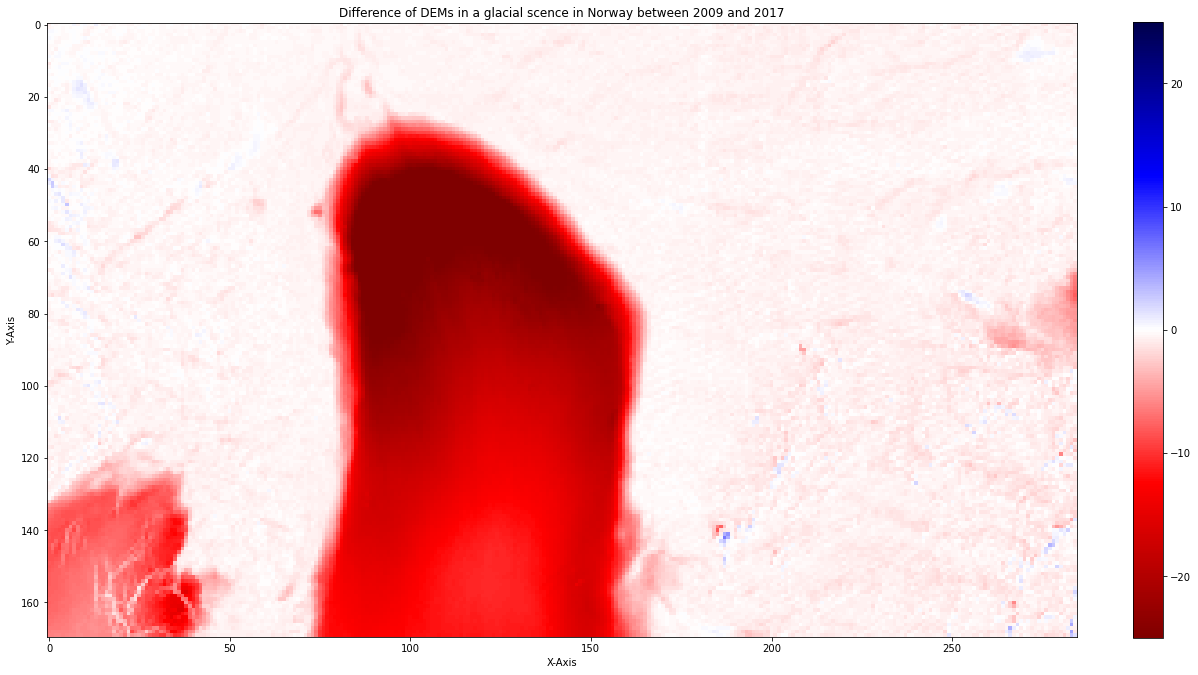

In [7]:
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from osgeo import gdal
import time

# print(os.getcwd())
# os.chdir(r"F:\Geoscripting with Python\exam") #---- change with your path to the file/data
gdal.UseExceptions()

starttime = time.time()

# Handling the input files
# ----------
in_dem09 = './data/glacier_2009.tif'
in_dem17 = './data/glacier_2017.tif'

# Read the input files as Numpy arrays and preprocess them
# ----------
def read_raster(in_dem):
    """
    Read the input files as Numpy arrays and preprocess them
    param in_dem: path to input file (string)
    output: returns a Numpy array (Null values are np.nan)
    """
    try:
        dem = gdal.Open(in_dem)
    except Exception as err:
        print('Unable to open the file because of: ', str(err), '\nPlease check your input file.')
        sys.exit(keep_kernel=True)
    band_dem = dem.GetRasterBand(1)
    cols = dem.RasterXSize
    rows = dem.RasterYSize
    for row_idx in range(0, rows):
        print("...reading the raster %s..." % (in_dem))
        try:
            data_dem  = band_dem.ReadAsArray(0, 0, cols, rows).astype(float)
            print("...reading %s worked." % in_dem)
        except Exception as err:
            print("Error occured when reading the data: " + str(err))
            sys.exit(keep_kernel=True)
        data_dem = np.where(data_dem == band_dem.GetNoDataValue(), np.nan, data_dem)
        return data_dem
    
# dem = gdal.Open(in_dem)
# geotransform = dem.GetGeoTransform()
# originX = geotransform[0]
# originY = geotransform[3]
# pixelWidth = geotransform[1]
# pixelHeight = geotransform[5]   

# x = originX + 0.5 * pixelWidth + pixelWidth * col_idx
# y = originY + 0.5 * pixelHeight + pixelHeight * row_idx

# Calculation of elevation difference
# ----------
print("Deriving difference between raster...")
try:
    dem_diff =  read_raster(in_dem17) - read_raster(in_dem09)
except Exception as err:
    print("Error occured when calculating the difference: " + str(err))
    sys.exit(keep_kernel=True)

# Empty RAM by deleting created data 
data_dem = None
band_dem = None

stoptime = time.time()

# Print out the information to user
# ----------
print ("Finished computing the difference of the DEMs with inputs %s & %s. \n The script took %.2f seconds to run." % (in_dem09, in_dem17, stoptime-starttime))

# Task 3 - print statistics of the difference calculation 
# ----------
print("--- STATISTICS OF DIFFERENCES ---")
print("Minimum difference: %.2f m" % np.nanmin(dem_diff))
print("Maximum difference: %.2f m" % np.nanmax(dem_diff))
print("Mean difference: %.2f m" % np.nanmean(dem_diff))
print("Median difference: %.2f m" % np.nanmedian(dem_diff))
print("Std.dev. of difference: %.2f m" % np.nanstd(dem_diff))
print("---------------------------")

# Plotting the nDSM
# ----------
plt.figure(figsize=(20,20))
plt.imshow(dem_diff, cmap='seismic_r', vmin=-25, vmax=25)
plt.title("Difference of DEMs in a glacial scence in Norway between 2009 and 2017")
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
# Plot a colorbar with the same height as the plot
im_ratio = dem_diff.shape[0]/dem_diff.shape[1]
plt.colorbar(fraction=0.04625*im_ratio)
plt.show()